In [91]:
import matplotlib.pyplot as plt
import numpy             as np

%matplotlib notebook

In [105]:
N_A   = 6.022e23  #Avogadro's number
k_b   = 1.38e-23  #Boltzmann's constant in J/K
g     = 9.8       #acceleration due to gravity

M_N2  = 28        #molar mass of N2 in grams/mole
M_O2  = 32        #molar mass of O2 in grams/mole
ang   = 1e-10     #angstroms
m_air = 4.8e-26   #molecular mass of air in kg

def calc_n0(P,T):
    return P/k_b/T

def calc_Vavg(T):
    return np.sqrt(8.0*k_b*T/np.pi/m_air)      
    
def calc_den(T,z):
    H_T =  29.5 #m/K defined in https://en.wikipedia.org/wiki/Scale_height but my own value
    H   = H_T*T
    
    P0   = 101325 #pascal at sea level
    n0   = calc_n0(P0,T)
    
    return n0*np.exp(-z/H)    

def calc_mean_free_path(T,z):
    d_N2 = 3.64*ang
    d_O2 = 3.46*ang
    d    = 0.78*d_N2 + 0.22*d_O2
    
    return 1/(np.sqrt(2.0)*np.pi*(d**2)*calc_den(T,z))

def calc_mean_free_path_raw(d,n):
    return 1/(np.sqrt(2.0)*np.pi*(d**2)*n)

def calc_collision_freq(T,z):
    return calc_mean_free_path(T,z)/calc_Vavg(T)

In [106]:
#checked against https://www.youtube.com/watch?v=yQoe61AQvZ4
T   = 300
alt = 0 
print(calc_Vavg(T))
print(calc_mean_free_path(T,alt))
print(calc_collision_freq(T,alt))

468.65106579076036
7.094427454871883e-08
1.5137973585745235e-10


In [107]:
z = np.arange(0,30_000,100)
T0 = 200
L0 = calc_mean_free_path(T0,z)
T1 = 250
L1 = calc_mean_free_path(T1,z)
T2 = 300
L2 = calc_mean_free_path(T2,z)
T3 = 350
L3 = calc_mean_free_path(T3,z)
T4 = 400
L4 = calc_mean_free_path(T4,z)

<IPython.core.display.Javascript object>


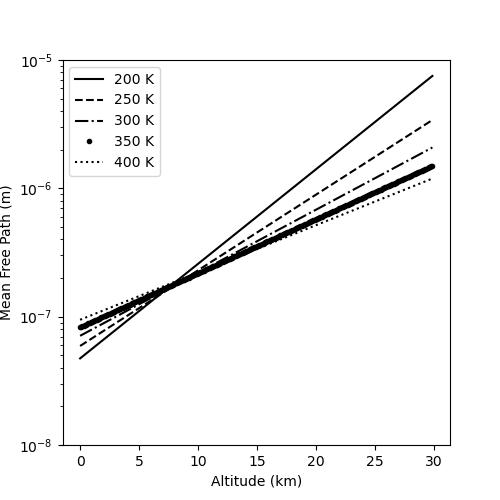

Text(0, 0.5, 'Mean Free Path (m)')

In [108]:
fig_L = plt.figure(figsize=(5,5))
ax_L  = fig_L.add_subplot(1,1,1)
ax_L.semilogy(z/1000,L0,'k-',  label = '200 K')
ax_L.semilogy(z/1000,L1,'k--', label = '250 K')
ax_L.semilogy(z/1000,L2,'k-.', label = '300 K')
ax_L.semilogy(z/1000,L3,'k.',  label = '350 K')
ax_L.semilogy(z/1000,L4,'k:',  label = '400 K')
ax_L.set_ylim([1e-8,1e-5])
ax_L.legend()
ax_L.set_xlabel('Altitude (km)')
ax_L.set_ylabel('Mean Free Path (m)')

In [102]:
fig_L.savefig('c:/Users/byecs/OneDrive/mean_free_path.png')

In [110]:
#taken from https://en.wikipedia.org/wiki/U.S._Standard_Atmosphere
P_11 = 22632.1
T_11 = 216.65
n_11 = P_11/k_b/T_11
print(n_11)
print(calc_mean_free_path_raw(360e-12,n_11))


7.569846509932201e+24
2.2942622239494543e-07


In [112]:
#taken from https://en.wikipedia.org/wiki/U.S._Standard_Atmosphere
P_32 = 868.019
T_32 = 216.65
n_32 = P_32/k_b/T_32
print(n_32)
print(calc_mean_free_path_raw(360e-12,n_32))

2.903296909126789e+23
5.981893492958844e-06


In [113]:
#taken from https://en.wikipedia.org/wiki/U.S._Standard_Atmosphere
P_71 = 3.95642
T_71 = 214.65
n_71 = P_71/k_b/T_71
print(n_71)
print(calc_mean_free_path_raw(360e-12,n_71))

1.3356492031179843e+21
0.0013002825029424239
